In [6]:
import os
import random
import glob
import PIL
import shutil
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import nibabel as nib

from sklearn.preprocessing import MinMaxScaler

In [45]:
# Load the .nii.gz file
file_path = './Task01_BrainTumour/imagesTr/BRATS_355.nii.gz'  # Replace with the actual file path
mask_path = './Task01_BrainTumour/labelsTr/BRATS_355.nii.gz'  # Replace with the actual file path
img = nib.load(file_path)
mask = nib.load(mask_path)

# Get the image data as a NumPy array
data_flair = img.get_fdata()[:,:,:, 0]
data_t1w = img.get_fdata()[:,:,:, 1]
data_t1gd = img.get_fdata()[:,:,:, 2]
data_t2w = img.get_fdata()[:,:,:, 3]
data_mask = mask.get_fdata()

print("Shape: ", data_flair.shape)
print("Dtype: ", data_flair.dtype)


Shape:  (240, 240, 155)
Dtype:  float64


In [46]:
print("Min: ", data_flair.min())
print("Max: ", data_flair.max())

Min:  0.0
Max:  1545.0


In [47]:
scaler = MinMaxScaler()

In [48]:
data_flair = scaler.fit_transform(data_flair.reshape(-1, data_flair.shape[-1])).reshape(data_flair.shape)
data_t1w = scaler.fit_transform(data_t1w.reshape(-1, data_t1w.shape[-1])).reshape(data_t1w.shape)
data_t1gd = scaler.fit_transform(data_t1gd.reshape(-1, data_t1gd.shape[-1])).reshape(data_t1gd.shape)
data_t2w = scaler.fit_transform(data_t2w.reshape(-1, data_t2w.shape[-1])).reshape(data_t2w.shape)

In [49]:
print("Min: ", data_flair.min())
print("Max: ", data_flair.max())

Min:  0.0
Max:  1.0


Slice Number: 95


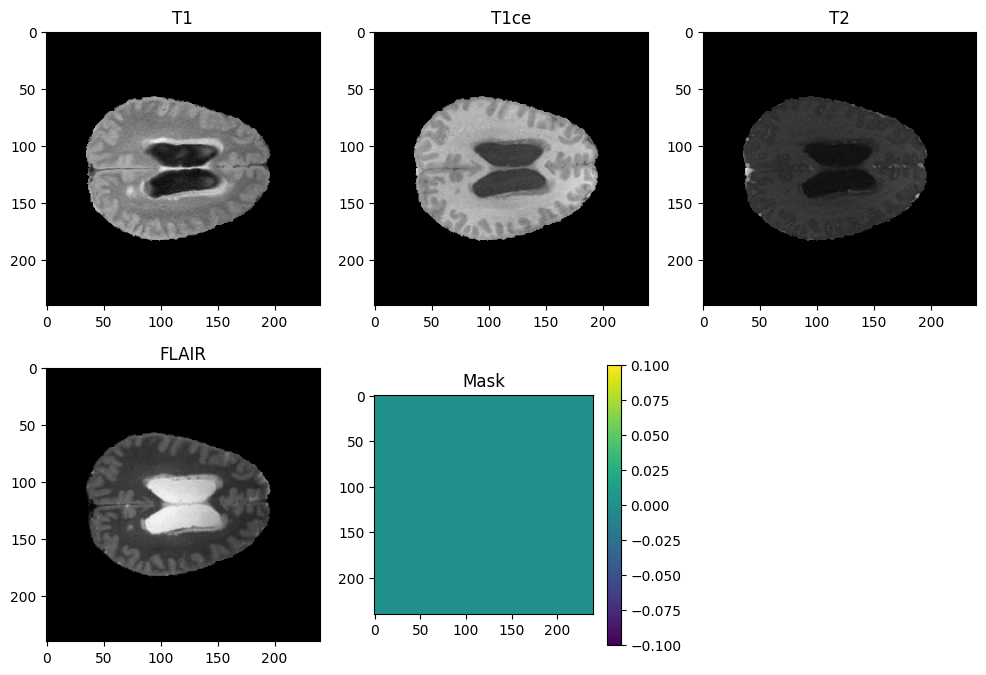

In [51]:
slice = 95

print("Slice Number: " + str(slice))

plt.figure(figsize=(12, 8))

# T1
plt.subplot(2, 3, 1)
plt.imshow(data_flair[:,:,slice], cmap='gray')
plt.title('T1')

# T1ce
plt.subplot(2, 3, 2)
plt.imshow(data_t1w[:,:,slice], cmap='gray')
plt.title('T1ce')

# T2
plt.subplot(2, 3, 3)
plt.imshow(data_t1gd[:,:,slice], cmap='gray')
plt.title('T2')

# Flair
plt.subplot(2, 3, 4)
plt.imshow(data_t2w[:,:,slice], cmap='gray')
plt.title('FLAIR')

# Mask
plt.subplot(2, 3, 5)
plt.imshow(data_mask[:,:,slice])
plt.colorbar()
plt.title('Mask')
plt.show()

In [44]:
# Load the .nii.gz file
test_path = './Task01_BrainTumour/imagesTs/BRATS_485.nii.gz'  # Replace with the actual file path
test_img = nib.load(test_path)

# Get the image data as a NumPy array
data_test = test_img.get_fdata()

print("Shape: ", data_test.shape)
print("Dtype: ", data_test.dtype)

Shape:  (240, 240, 155, 4)
Dtype:  float64
